<a href="https://colab.research.google.com/github/Kr9096/Machine-Learning-Projects/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Status Prediction

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analysis/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
df.shape

(614, 13)

In [ ]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
422,LP002361,Male,Yes,0,Graduate,No,1820,1719.0,100.0,360.0,1.0,Urban,Y
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isnull().sum() / df.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
# There are very few null values but our data is small so there will be some impact

# So let's try to manipulate them

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#df["Gender"].isnull().sum()

In [ ]:
df_null_col = ((df.isnull().sum() / df.shape[0] * 100) > 0).keys() # This don't work because it will give you all the column names, but we need only true  columns so.
df_null_col = [i for i in df.columns if df[i].isnull().sum() > 0 ]

In [ ]:
df_null = df[df_null_col]
df_null

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,No,71.0,360.0,1.0
610,Male,Yes,3+,No,40.0,180.0,1.0
611,Male,Yes,1,No,253.0,360.0,1.0
612,Male,Yes,2,No,187.0,360.0,1.0


In [ ]:
# Lets work on numerical columns first

df_null_num = df_null.select_dtypes(include = ["int64","float64"]).columns

In [ ]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
423,LP002362,Male,Yes,1,Graduate,No,7250,1667.0,110.0,NaN,0.0,Urban,N
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
238,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,Y
501,LP002606,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
132,LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y


In [ ]:
# We have 5 columns that contains null values
# We will fill the Applicant income and coapplicant income based on Gender
# We will fill the LoanAmount', 'Loan_Amount_Term', based on property area
# Credit history by its mean.

In [ ]:
df[['ApplicantIncome', 'CoapplicantIncome',"Gender"]].groupby('Gender').mean()

,ApplicantIncome,CoapplicantIncome
Gender,,
Female,4643.473214,1108.008929
Male,5446.460123,1742.932352


In [ ]:
# Creating a copy of df
df1 = df.copy()   # For main df
df2 = df.copy()   # for numeric and categorical dtypes

In [ ]:
# 1.
for i in ['ApplicantIncome', 'CoapplicantIncome']:
  for j in df["Gender"].value_counts().keys():
    df2.update(df[df["Gender"] == j][i].replace(np.nan,df[df["Gender"] == j][i].mean()))

In [ ]:
# 2.
for i in ['LoanAmount','Loan_Amount_Term']:
  for j in df.Property_Area.value_counts().keys():
    df2.update(df[df["Property_Area"] == j][i].replace(np.nan,df[df["Property_Area"] == j][i].mean()))

In [ ]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df2['Credit_History'].fillna(df['Credit_History'].mean(),inplace = True)

In [ ]:
#df.select_dtypes(include=["object"])

# Lets visualize the changes

# Fill all the na with 0, it will be easy for histogram

df1.fillna(0,inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

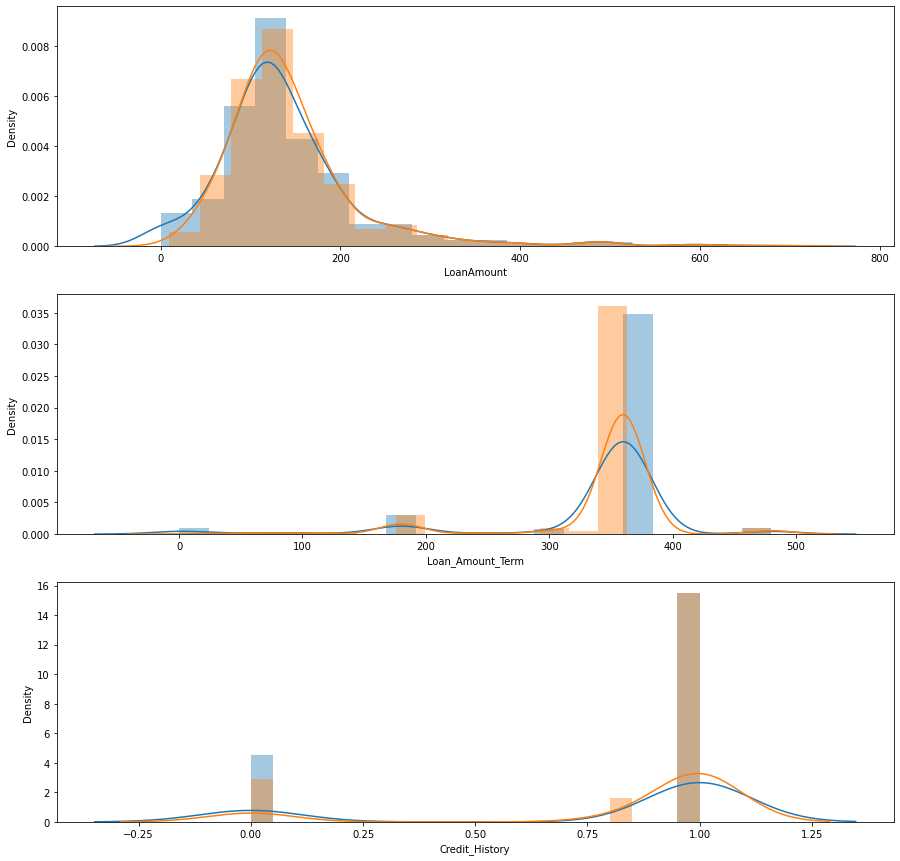

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,15))

for ind,i in enumerate(df[df_null_num]):
  plt.subplot(3,1,ind+1)
  sns.distplot(df1[i],bins=20)
  sns.distplot(df2[i],bins=20)

In [ ]:
# Lets work on categorical data

In [ ]:
df_null_cat = df_null.select_dtypes(include="object").keys()

In [ ]:
for i in df_null_cat:
  df2[i].fillna(df2[i].mode()[0],inplace=True)

In [ ]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Lets have loot at the changes
for i in df_null_cat:
  print(pd.concat([df[i].value_counts() / df.shape[0] * 100 ,df2[i].value_counts()  / df.shape[0] * 100],axis=1,keys=(i+"withna",i+"withoutna"))) # We can see the difference between them

        Genderwithna  Genderwithoutna
Male       79.641694        81.758958
Female     18.241042        18.241042
     Marriedwithna  Marriedwithoutna
Yes      64.820847         65.309446
No       34.690554         34.690554
    Dependentswithna  Dependentswithoutna
0          56.188925            58.631922
1          16.612378            16.612378
2          16.449511            16.449511
3+          8.306189             8.306189
     Self_Employedwithna  Self_Employedwithoutna
No             81.433225               86.644951
Yes            13.355049               13.355049


# EDA

In [ ]:
df.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
179,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
274,LP001896,Male,Yes,2,Graduate,No,3900,0.0,90.0,360.0,1.0,Semiurban,Y


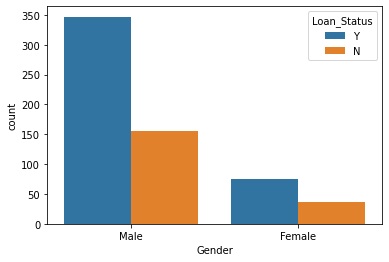

In [ ]:
# Lets find the approval rate for male and female

sns.countplot(x="Gender",hue="Loan_Status",data=df2,)  # The approval rate for male is more compared with female, We can't conclude with this because we have to include other factors

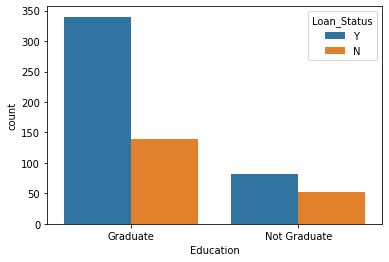

In [ ]:
# Lets find the approval rate based on education
sns.countplot(x="Education",hue="Loan_Status",data=df2,) # Approval rate is more for educated people

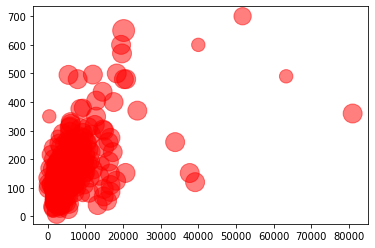

In [ ]:
plt.scatter(df2["ApplicantIncome"], df2["LoanAmount"], s=df2["Loan_Amount_Term"], c="red", alpha=0.5)

# Label encoding

In [ ]:
# First we will try manually and after that we will work on one hot encoding

df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df2_enc = df2.copy()
df2_enc_sk = df2.copy()


In [ ]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df2_enc.replace({"Gender":{"Male":1,"Female":0}, "Married":{"Yes":1,"No":0},"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Urban":1,"Rural":2,"Rural":3},"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [ ]:
df[["Education","Self_Employed"]].value_counts()

Education     Self_Employed
Graduate      No               389
Not Graduate  No               111
Graduate      Yes               65
Not Graduate  Yes               17
dtype: int64

In [ ]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df2_enc["Education"] = df2_enc["Education"].map({"Graduate":1,"Not Graduate":0})

In [ ]:
df2_enc.head(2)  # This is how we can encode the labels

# What if we have 100's of columns? Better to use oneHotEncoding

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,142.198953,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,3,0


# Using sklearn to do encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# Labelencoder for Y-columns(dependent column)
# Ordinal encoding for X-columns which has relationship

In [ ]:
le = LabelEncoder()
df2_enc_sk["Loan_Status"] = le.fit_transform(df2_enc_sk["Loan_Status"])

In [ ]:
df2_enc_sk.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,142.198953,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0


In [ ]:
oe = OrdinalEncoder()
df2_enc_sk[["Gender","Married","Education","Self_Employed"]] = oe.fit_transform(df2_enc_sk[["Gender","Married","Education","Self_Employed"]])

In [ ]:
df2_enc_sk.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849.0,0.0,142.198953,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,Rural,0


In [ ]:
# OneHotEncoding for Columns who dosen't have relationship

In [ ]:
df2_enc_sk["Property_Area"] = df2_enc_sk["Property_Area"].astype('category')
df2_enc_sk["Property_Area"].dtypes

CategoricalDtype(categories=['Rural', 'Semiurban', 'Urban'], ordered=False)

In [ ]:
(df2_enc_sk["Property_Area"].cat.codes).value_counts()

1    233
2    202
0    179
dtype: int64

In [ ]:
df2_enc_sk["Property_Area"] = df2_enc_sk["Property_Area"].cat.codes


In [ ]:
import numpy as np

ohe = OneHotEncoder(drop='first',sparse=False)  # OHE will give a sparse matrix, so we are using toarray() to view it.

# We removed the first column to avoid the multicolinearity, IF both are 0 it means that is Rural

#pd.DataFrame(ohe.fit_transform(df2_enc_sk["Property_Area"]).toarray())
new_df = pd.DataFrame(ohe.fit_transform(df2_enc_sk[["Property_Area"]]))
df2_enc_sk = df2_enc_sk.join(new_df)

In [ ]:
df2_enc_sk.rename(columns = {0:'Semiurban',1:"Urban"}, inplace = True)

In [ ]:
df2_enc_sk.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,1.0,0.0,0,0.0,0.0,5849.0,0.0,142.198953,360.0,1.0,2,1,0.0,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0,0,0.0,0.0


In [ ]:
df2_enc_sk.replace({"Dependents":{"3+":4}},inplace=True)

In [ ]:
df2_enc_sk["Dependents"].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [ ]:
df2 = df2_enc_sk

In [ ]:
df2.head(2) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,1.0,0.0,0,0.0,0.0,5849.0,0.0,142.198953,360.0,1.0,2,1,0.0,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0,0,0.0,0.0


In [ ]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Semiurban            0
Urban                0
dtype: int64

In [ ]:
df2["Dependents"] = df2["Dependents"].astype("int64")
df2.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents             int64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area           int8
Loan_Status            int64
Semiurban            float64
Urban                float64
dtype: object

# Lets do the model building

In [ ]:
X = df2.drop(["Loan_ID","Loan_Status"],axis=1)
y = df2["Loan_Status"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify= y,random_state=7)

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((552, 13), (62, 13), (552,))

# Training the model

In [ ]:
from sklearn import svm
svm_cl = svm.SVC(kernel = "linear")
svm_cl.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
svm_predict = svm_cl.predict(X_test)
accuracy_score(svm_predict,y_test)

0.8225806451612904

In [ ]:
df2.head(2) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,1.0,0.0,0,0.0,0.0,5849.0,0.0,142.198953,360.0,1.0,2,1,0.0,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0,0,0.0,0.0


In [ ]:
# Not working single inp
inp = (1.0,0.0,0,0.0,0.0,5849.0,0.0,142.198953,360.0,1.0,2,0.0,1.0)
test1 = np.asarray(inp)
test = test1.reshape(1, -1)

svm_cl.predict(test)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

Which is True